In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss
import sklearn
!python --version

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
## Matplotlib style
fav_style = ('ggplot', 'seaborn-dark-palette')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

Python 3.9.15


C:\Users\paulm\AppData\Local\Temp\ipykernel_9680\4218968804.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(fav_style)


In [2]:
sp =pd.read_csv(r"C:\Users\paulm\Documents\Saved Data for DataFrames - Coding dojo\sales_predictions (1).csv")
sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
## make columns lowercase for ease of reference and display names
sp.columns = sp.columns.str.lower()
sp.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [4]:
replace_dict1 = {'Medium':1, 'Small':0, 'High':2}
replace_dict2 = {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}
replace_dict4 = {'Low Fat': 0, 'Regular':1,'reg':1, 'low fat':0, 'LF':0}
sp['outlet_size'].replace(replace_dict1, inplace=True)
sp['outlet_location_type'].replace(replace_dict2, inplace=True)
sp['item_fat_content'].replace(replace_dict4, inplace=True)

In [5]:
# reviewing data using .info .isna(missing rows) and .duplicated
print(sp.info(), '\n')
print(sp.isna().sum())
print('\n')
print(sp.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   int64  
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   float64
 9   outlet_location_type       8523 non-null   int64  
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 799.2+ KB
None 

item_identifier                 0
item

In [6]:
# checking breadown of numeric columns
sp.describe()

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,0.761819,1.112871,2181.288914
std,4.643456,0.477836,0.051598,62.275067,8.371760,0.697463,0.812757,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1987.000000,0.000000,0.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,1999.000000,1.000000,1.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,2004.000000,1.000000,2.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,2.000000,2.000000,13086.964800


In [7]:
sp.describe(exclude='number')

,item_identifier,item_type,outlet_identifier,outlet_type
count,8523,8523,8523,8523
unique,1559,16,10,4
top,FDW13,Fruits and Vegetables,OUT027,Supermarket Type1
freq,10,1232,935,5577


In [8]:
sp = sp.dropna(subset=['item_outlet_sales'])

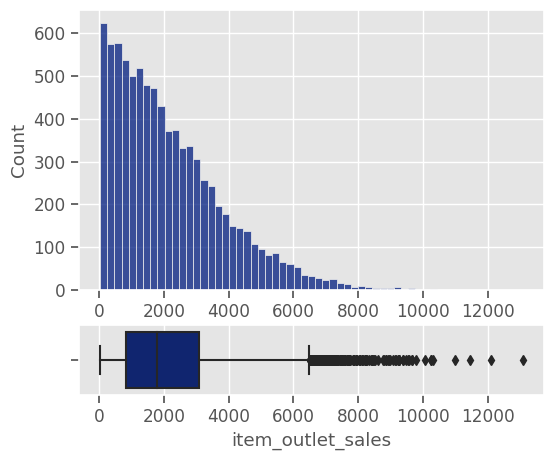

In [9]:
target = 'item_outlet_sales'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=sp, x=target, ax=axes[0])
sns.boxplot(data=sp, x=target, ax=axes[1]);

In [10]:
## Make x and y variables
y = sp['item_outlet_sales']
X = sp.drop(columns = ['item_outlet_sales', 'item_identifier',
                       'outlet_establishment_year', 'outlet_identifier'])
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
X_train.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type
4776,16.350,0,0.029565,Household,256.4646,1.0,2,Supermarket Type2
7510,15.250,1,0.000000,Snack Foods,179.7660,1.0,2,Supermarket Type2
5828,12.350,1,0.158716,Meat,157.2946,1.0,0,Supermarket Type1
5327,7.975,0,0.014628,Baking Goods,82.3250,0.0,1,Supermarket Type1
4810,19.350,0,0.016645,Frozen Foods,120.9098,NaN,1,Supermarket Type1


In [11]:
# using selector to select all objects
c_sel = make_column_selector(dtype_include='object')
# using selector to select all numbers
n_sel = make_column_selector(dtype_include= 'number')
# creating imputer for nominal features replacing missing vaules with most frequent
freq_imputer = SimpleImputer(strategy = 'most_frequent')
# creating imputer for number features replacing all missing values with median
med_imputer = SimpleImputer(strategy= 'median')
# using standardscaler to scale numerical values
scaler = StandardScaler()
# using OHE assit in replacing objects for nominal vaules
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
# making pipeline using my med imputer along with scaler
n_pipe = make_pipeline(med_imputer, scaler)
# making pipeline using my freq imputer with OHE
c_pipe = make_pipeline(freq_imputer, ohe)

In [12]:
preprocessor = make_column_transformer((n_pipe, n_sel),
                                       (c_pipe, c_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_size,outlet_location_type,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,item_type_Canned,...,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3
4776,0.827485,-0.740321,-0.712775,1.828109,0.287374,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.566644,1.350766,-1.291052,0.603369,0.287374,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.350766,1.813319,0.244541,0.287374,-1.384777,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-0.740321,-1.004931,-0.952591,-1.384048,-0.149914,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.740321,-0.965484,-0.336460,0.287374,-0.149914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.821742,1.350766,4.309657,-0.044657,0.287374,1.084948,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5191,0.649639,-0.740321,1.008625,-1.058907,0.287374,-0.149914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,1.123896,-0.740321,-0.920527,1.523027,0.287374,-0.149914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,1.775999,-0.740321,-0.227755,-0.383777,0.287374,-0.149914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [14]:
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.43,"1,140.38"
Test,0.57,805.39,"1,094.39"


In [15]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [16]:
coeffs = get_coefficients(lin_reg)
coeffs

item_weight                          -7.422967
item_fat_content                     30.224043
item_visibility                     -21.685841
item_mrp                            984.306464
outlet_size                          -6.961557
outlet_location_type                 11.026963
item_type_Baking Goods              -17.227242
item_type_Breads                    -47.273505
item_type_Breakfast                  29.813026
item_type_Canned                      8.222359
item_type_Dairy                    -123.145016
item_type_Frozen Foods              -19.656916
item_type_Fruits and Vegetables      26.423593
item_type_Hard Drinks                -7.141192
item_type_Health and Hygiene          9.278857
item_type_Household                 -13.995999
item_type_Meat                      -26.898475
item_type_Others                    -48.992768
item_type_Seafood                   300.526844
item_type_Snack Foods               -38.099833
item_type_Soft Drinks               -59.537128
item_type_Sta

In [17]:
## formatting numbers to not use , thousands sep, and 2 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")
pd.set_option('display.max_rows', None)

In [18]:
coeffs.sort_values()

outlet_type_Grocery Store         -1,735.47
item_type_Dairy                     -123.15
outlet_type_Supermarket Type2        -99.67
item_type_Soft Drinks                -59.54
item_type_Others                     -48.99
item_type_Breads                     -47.27
item_type_Snack Foods                -38.10
item_type_Meat                       -26.90
item_visibility                      -21.69
item_type_Frozen Foods               -19.66
item_type_Baking Goods               -17.23
item_type_Household                  -14.00
item_weight                           -7.42
item_type_Hard Drinks                 -7.14
outlet_size                           -6.96
item_type_Canned                       8.22
item_type_Health and Hygiene           9.28
outlet_location_type                  11.03
item_type_Fruits and Vegetables       26.42
item_type_Starchy Foods               27.70
item_type_Breakfast                   29.81
item_fat_content                      30.22
outlet_type_Supermarket Type1   

In [22]:
oi = [c for c in X_train_df.columns if c.startswith('item')]
len(oi)

20

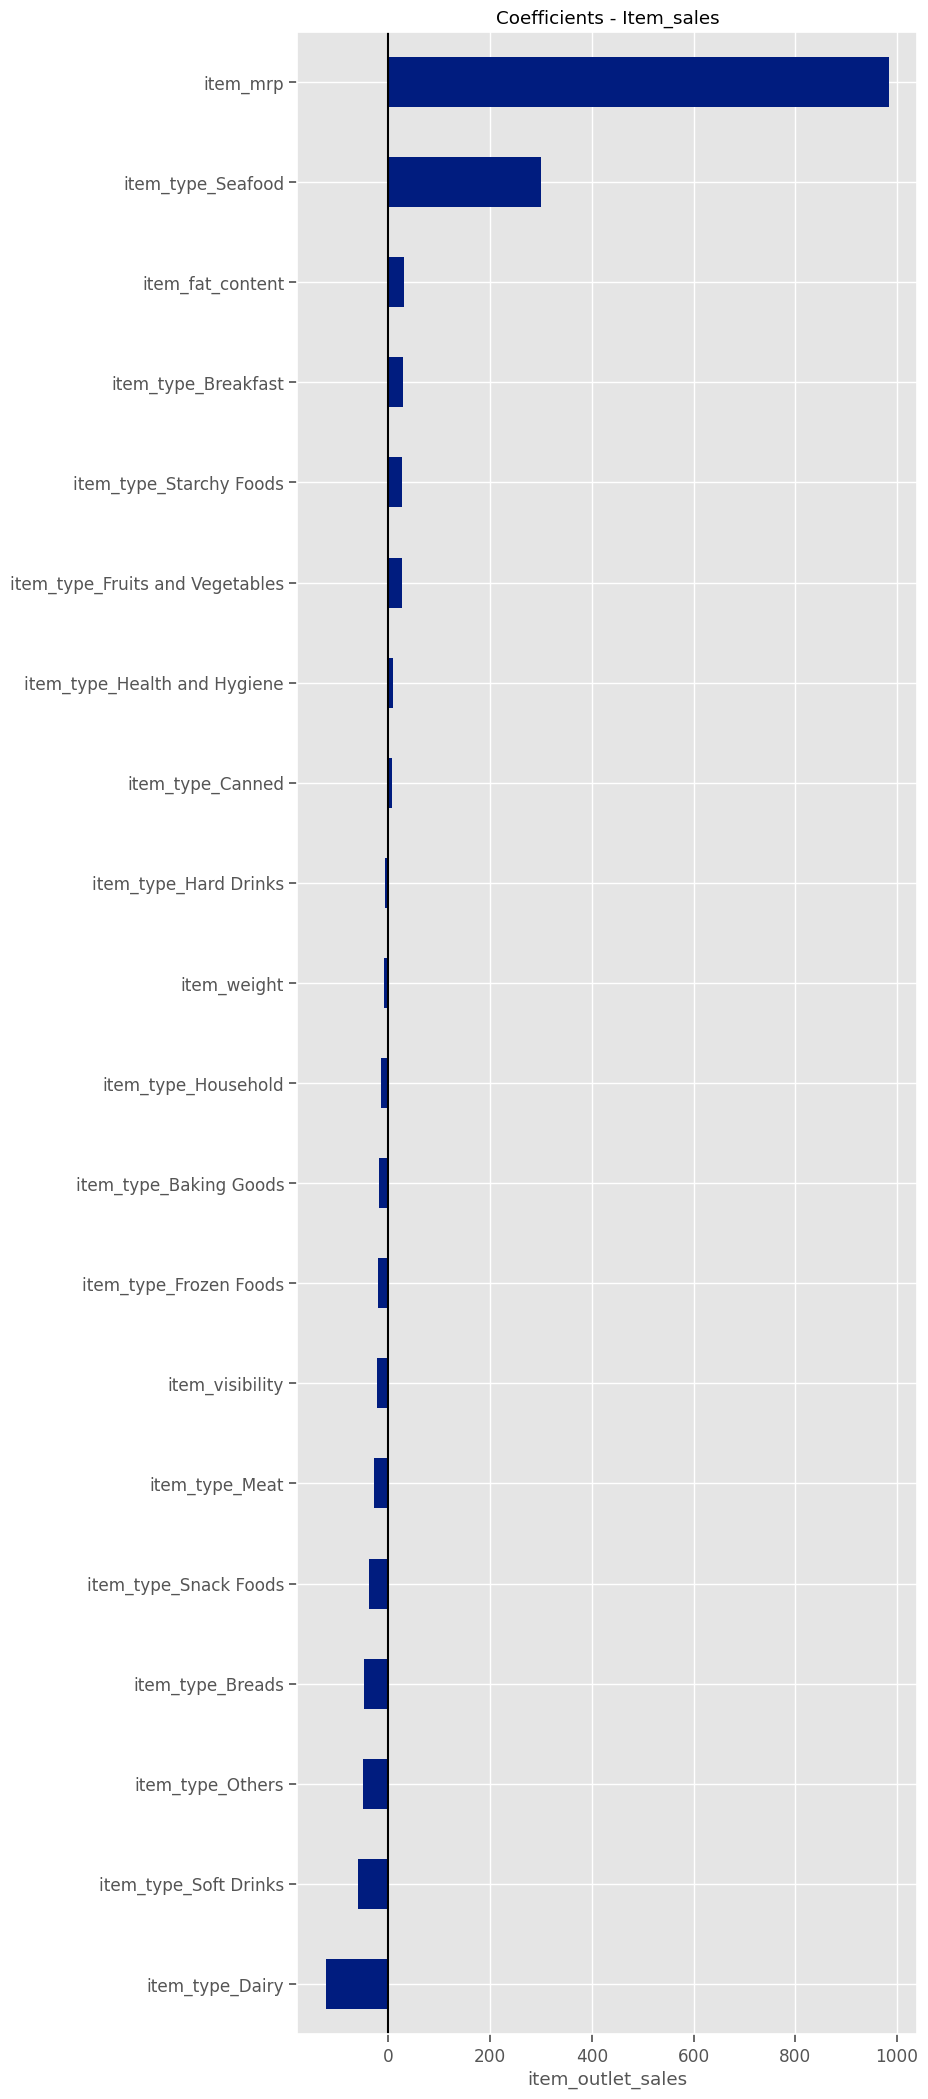

In [26]:
ax = coeffs[oi].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0,color='k')
ax.set(xlabel='item_outlet_sales', title='Coefficients - Item_sales');

[Text(0.5, 0, 'item_outlet_sales'),
 Text(0.5, 1.0, 'Coefficients - Without Item_sales')]

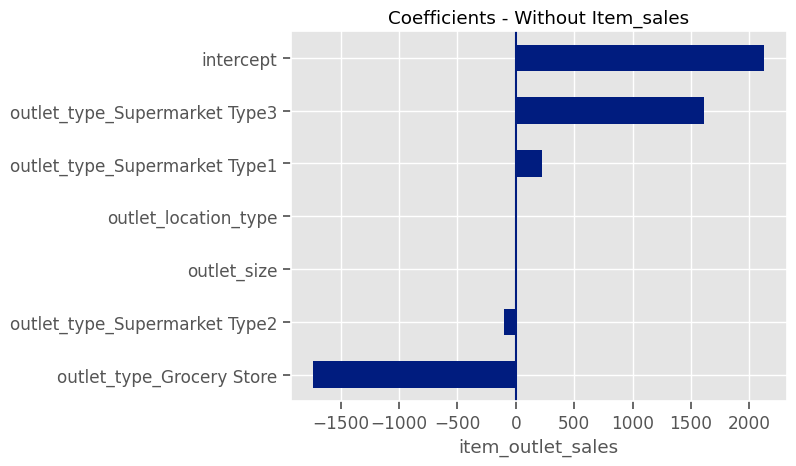

In [27]:
ax = coeffs.drop(oi).sort_values().plot(kind='barh')
ax.axvline(0)
ax.set(xlabel='item_outlet_sales', title='Coefficients - Without Item_sales')

In [28]:
lin_reg_noint= LinearRegression(fit_intercept=False)
lin_reg_noint.fit(X_train_df,y_train)
evaluate_regression(lin_reg_noint, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.43,"1,140.38"
Test,0.57,805.39,"1,094.39"


In [29]:
coeffs_noint = get_coefficients(lin_reg_noint)
coeffs_noint

item_weight                          -7.42
item_fat_content                     30.22
item_visibility                     -21.69
item_mrp                            984.31
outlet_size                          -6.96
outlet_location_type                 11.03
item_type_Baking Goods              408.10
item_type_Breads                    378.06
item_type_Breakfast                 455.14
item_type_Canned                    433.55
item_type_Dairy                     302.18
item_type_Frozen Foods              405.67
item_type_Fruits and Vegetables     451.75
item_type_Hard Drinks               418.19
item_type_Health and Hygiene        434.61
item_type_Household                 411.33
item_type_Meat                      398.43
item_type_Others                    376.34
item_type_Seafood                   725.86
item_type_Snack Foods               387.23
item_type_Soft Drinks               365.79
item_type_Starchy Foods             453.03
outlet_type_Grocery Store           -34.15
outlet_type

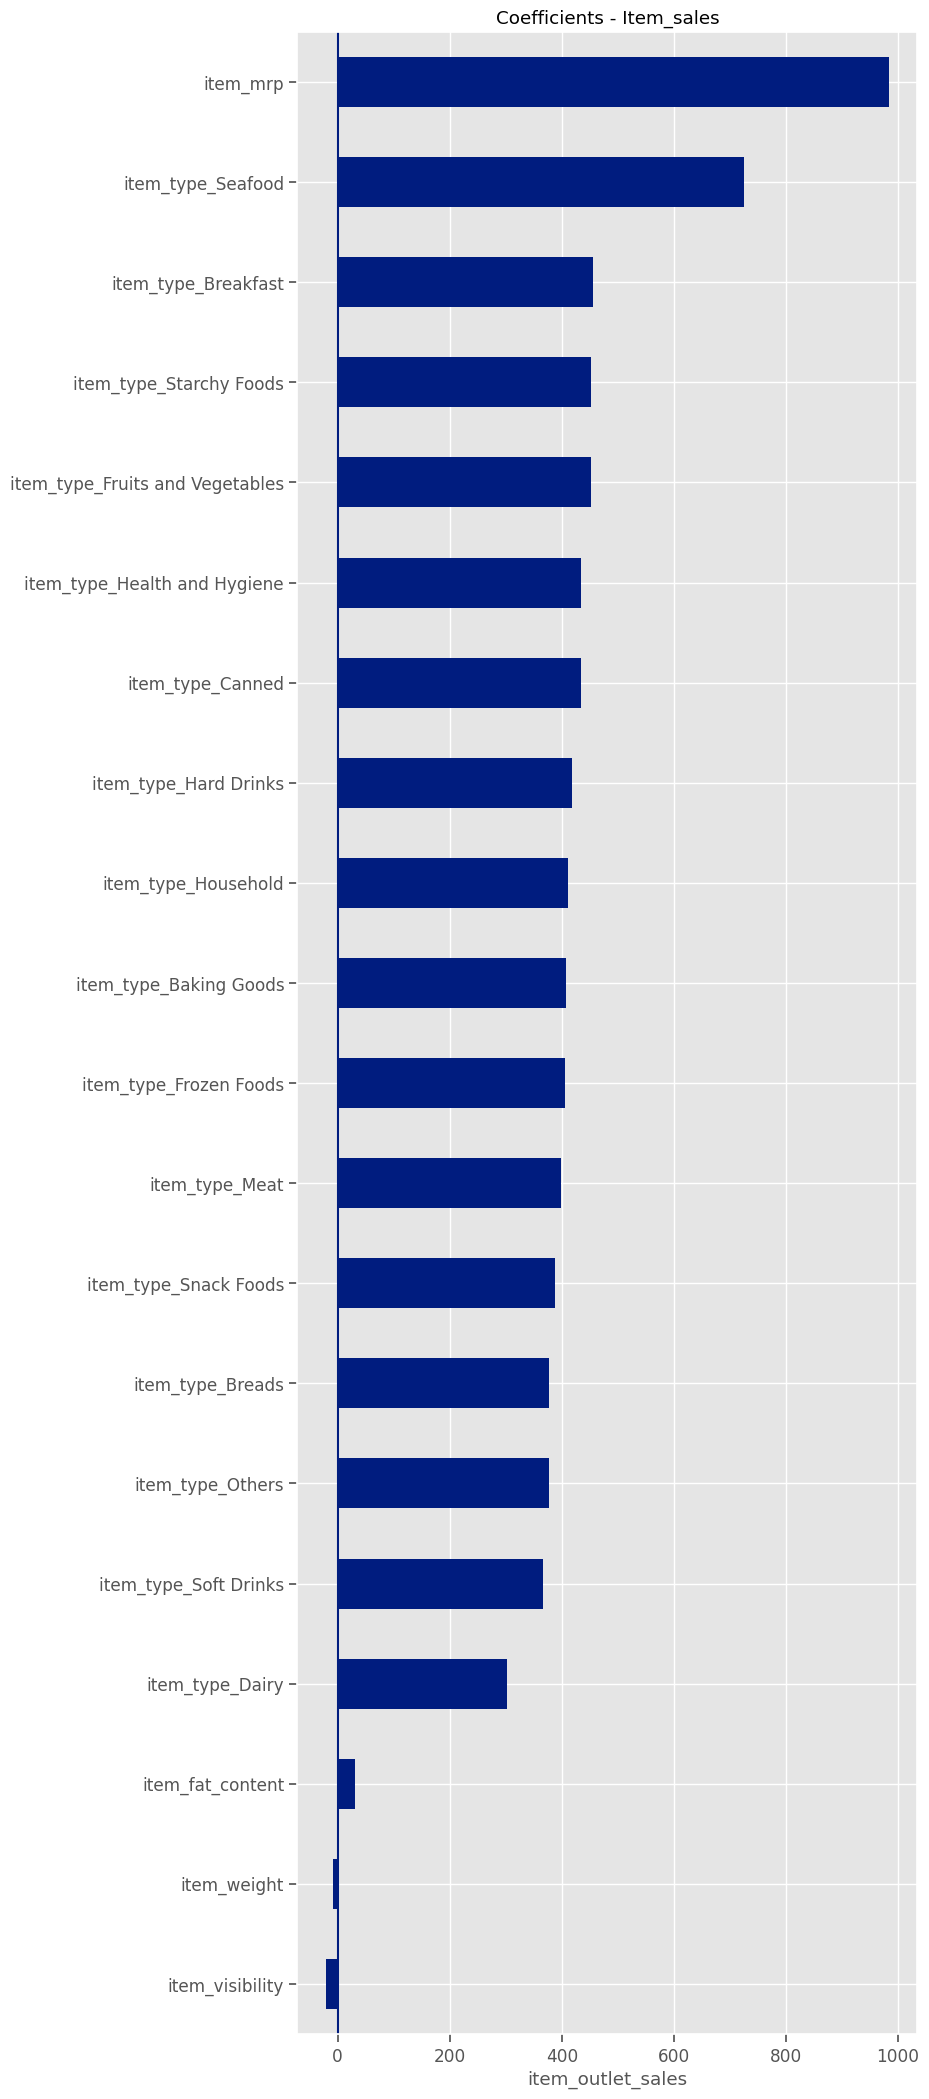

In [32]:
ax = coeffs_noint[oi].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='item_outlet_sales', title="Coefficients - Item_sales");

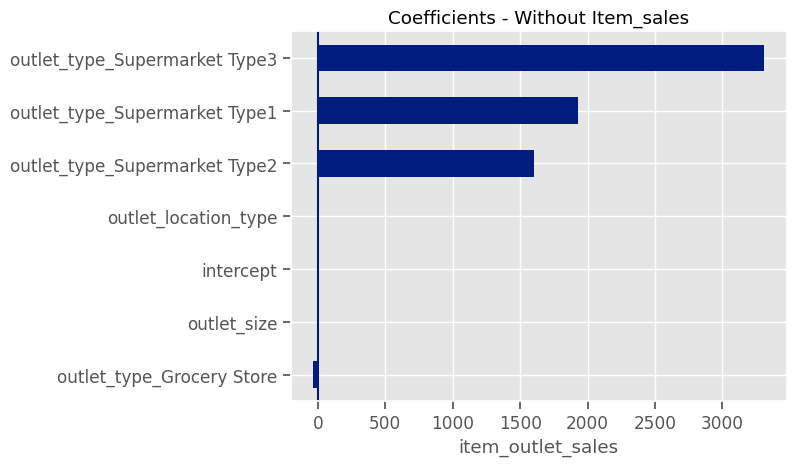

In [35]:
ax = coeffs_noint.drop(oi).sort_values().plot(kind='barh')
ax.axvline(0)
ax.set(xlabel='item_outlet_sales', title="Coefficients - Without Item_sales");